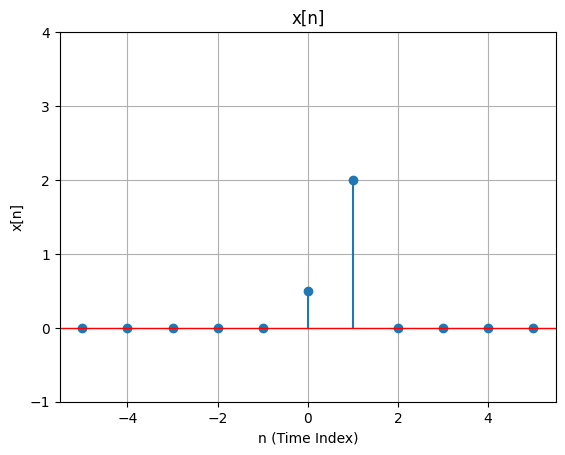

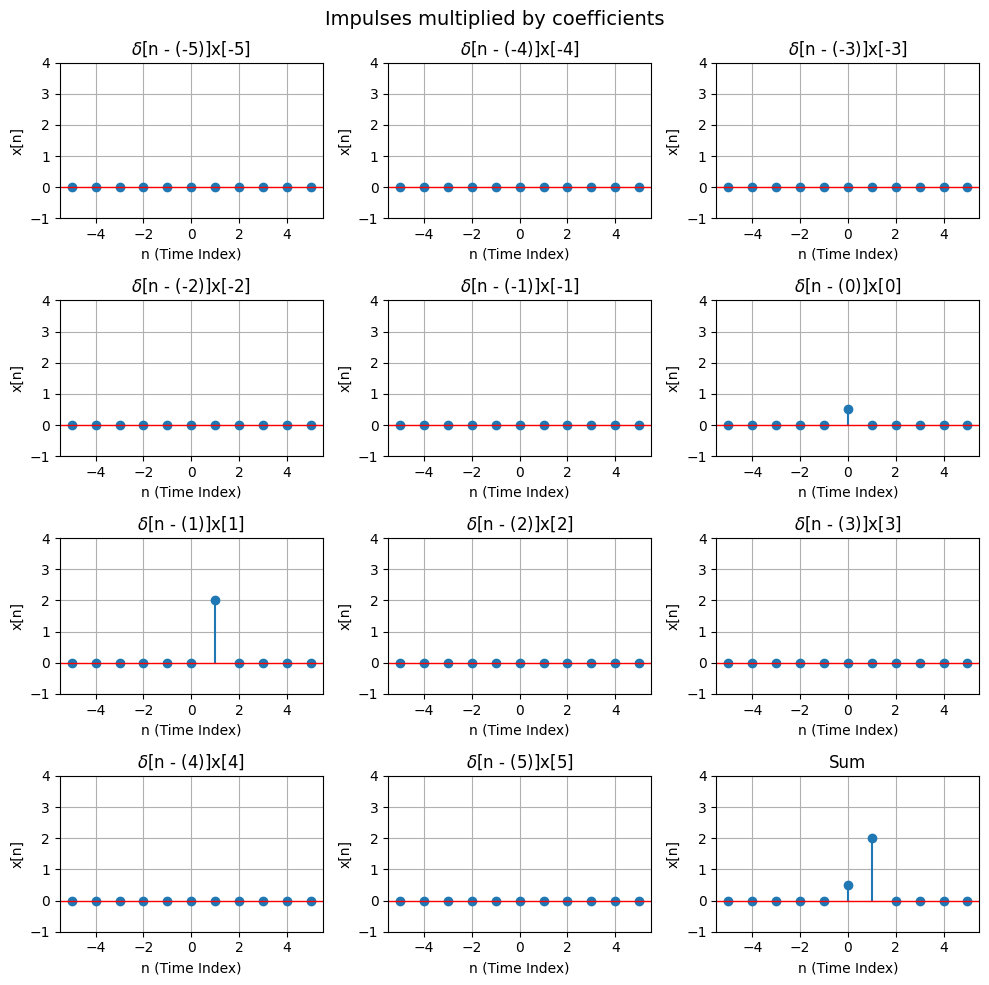

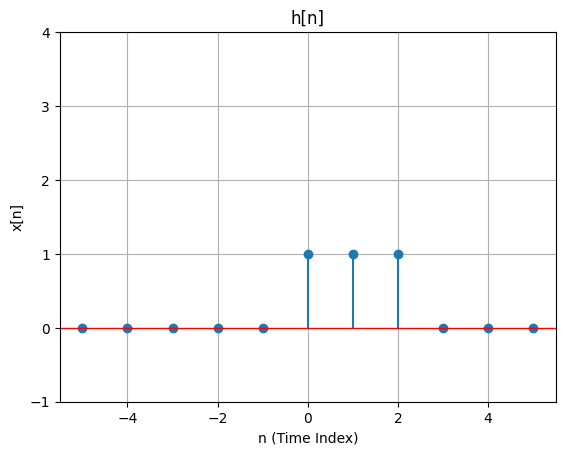

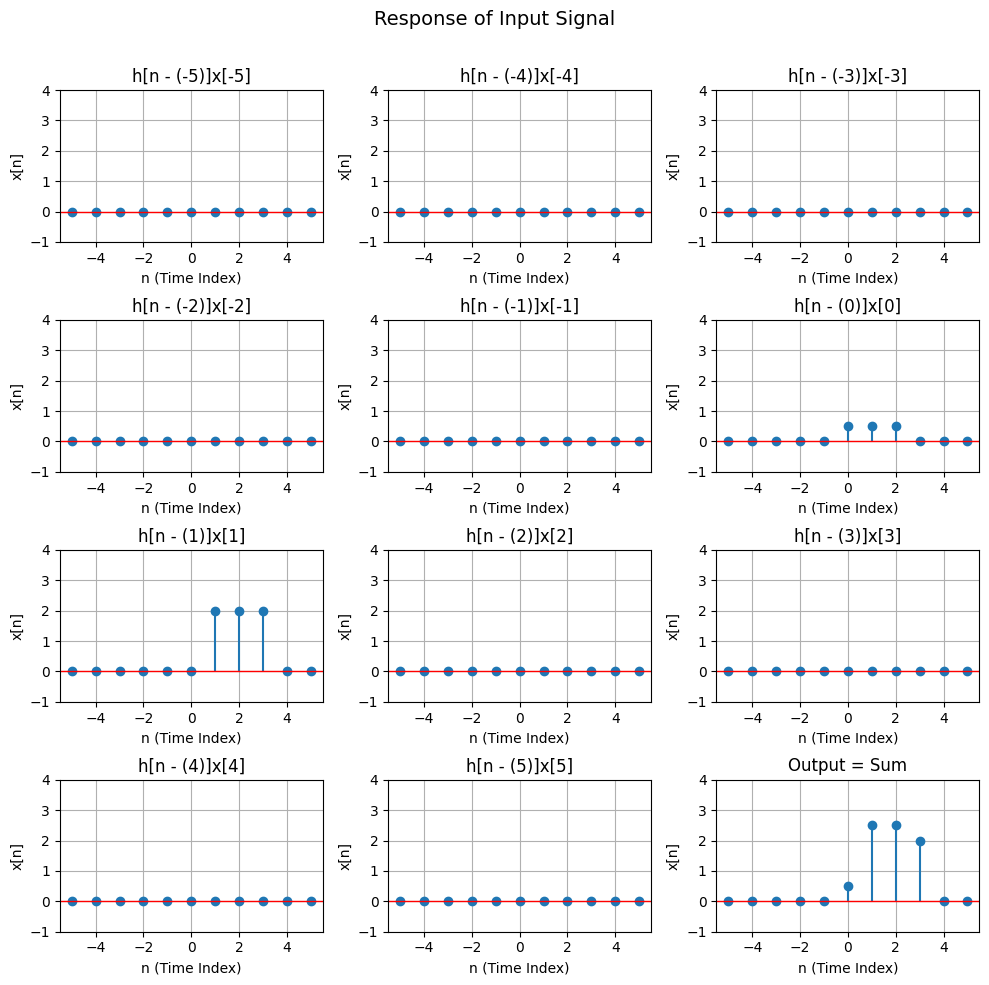

In [1]:
import numpy as np
import matplotlib.pyplot as plt
class DiscreteSignal:
    def __init__(self, INF):
        self.INF = INF
        self.values = np.zeros(2 * INF + 1)  # Signal values are initialized to zero

    def set_value_at_time(self, time, value):
        index = time + self.INF  # Shift time to handle negative indices
        if 0 <= index < len(self.values):
            self.values[index] = value
        # else:
        #     raise ValueError("Time index is out of range.")

    def shift_signal(self, shift):
        # """Return a new signal instance with a shifted signal x[n - shift]."""
        new_signal = DiscreteSignal(self.INF)
        for i in range(-self.INF, self.INF + 1):
            index = i+shift
            if -self.INF <= index <= self.INF:
                new_signal.set_value_at_time(i, self.values[index + self.INF])
        return new_signal

    def add(self, other):
        # """Add two discrete signals and return the result."""
        if len(self.values) != len(other.values):
            raise ValueError("Signals must have the same length.")
        new_signal = DiscreteSignal(self.INF)
        new_signal.values = self.values + other.values
        return new_signal

    def multiply(self, other):
        # """Multiply two discrete signals element-wise and return the result."""
        if len(self.values) != len(other.values):
            raise ValueError("Signals must have the same length.")
        new_signal = DiscreteSignal(self.INF)
        new_signal.values = self.values * other.values
        return new_signal

    def multiply_const_factor(self, scaler):
        # """Multiply the signal by a constant factor and return the result."""
        new_signal = DiscreteSignal(self.INF)
        new_signal.values = self.values * scaler
        return new_signal

    def plot(self, ax, title="Discrete Signal",low=-1,high=4):
        time = np.arange(-self.INF, self.INF + 1)
        ax.stem(time, self.values, basefmt=" ")
        ax.set_title(title)
        ax.set_xlabel('n (Time Index)')
        ax.set_ylabel('x[n]')
        ax.set_ylim(low,high)
        ax.axhline(0, color='red', linestyle='-', linewidth=1.0)
        ax.grid(True)


class DiscreteLTI:
    def __init__(self,impulse_response):
        self.impulse_response = impulse_response
    def linear_combination_of_impulses(self,input_signal):
        impulses = []
        coefficients = []
        for n,value in enumerate(input_signal.values):
            # if value!=0:
            impulse = DiscreteSignal(input_signal.INF)
            impulse.set_value_at_time(n-input_signal.INF,value!=0)
            # impulse.plot()
            impulses.append(impulse)
            coefficients.append(value)
        # for i in range(-input_signal.INF,input_signal.INF+1):
        #     if input_signal[i+input_signal.INF]!=0:
        #         impulse = DiscreteSignal(input_signal.INF)
        #         impulse.set_value_at_time(i,1)
        #         # impulse.plot()
        #         impulses.append(impulse)
        #         coefficients.append(input_signal.values[i+input_signal.INF])
        return impulses,coefficients
    
    def output(self, input_signal):
        impulses, coefficients = self.linear_combination_of_impulses(input_signal)
        output_signal = DiscreteSignal(input_signal.INF)
        totalplots = 2*input_signal.INF+2
        rows = totalplots//3
        fig, axes = plt.subplots(rows,totalplots//rows, figsize=(10, 10))
        fig.suptitle("Response of Input Signal", fontsize=14)
        # loopi=0
        
        for i, (impulse, ax) in enumerate(zip(impulses, axes.flat[:-1])):  # Skip the last subplot for sum
            shifted_impulse = self.impulse_response.shift_signal(input_signal.INF - i)
            to_plot = shifted_impulse.multiply_const_factor(coefficients[i])
            title = f'h[n - ({i - input_signal.INF})]x[{i - input_signal.INF}]'
            to_plot.plot(ax, title,-1,input_signal.values.max()+2)

            output_signal = output_signal.add(to_plot)
            # loopi+=1
        
        # Plot the sum signal in the last subplot
        # print(loopi)
        sumt = f'Output = Sum'
        output_signal.plot(axes.flat[-1], sumt)
        
        plt.tight_layout()
        plt.subplots_adjust(top=0.9)
        plt.show()
        
        return output_signal
def main():
    impulse_response = DiscreteSignal(5)
    impulse_response.set_value_at_time(0, 1)
    impulse_response.set_value_at_time(1, 1)
    impulse_response.set_value_at_time(2, 1)

    input_signal = DiscreteSignal(5)
    lti = DiscreteLTI(impulse_response)
    input_signal.set_value_at_time(0, 0.5)
    input_signal.set_value_at_time(1, 2)
    # Plot Input Signal
    fig, ax = plt.subplots()  # Create another figure and axis
    input_signal.plot(ax, "x[n]",-1,input_signal.values.max()+2)  # Pass the axis to the plot method
    
    impulse = DiscreteSignal(5)
    impulse.set_value_at_time(0,1)

    totalplots = 2*input_signal.INF+2
    rows = totalplots//3
    fig, axes = plt.subplots(rows,totalplots//rows, figsize=(10, 10))
    fig.suptitle("Impulses multiplied by coefficients", fontsize=14)
    # impulse.plot(ax,"impulse")
    for i, ax in enumerate(axes.flat[:-1]):
        shifted_impulse = impulse.shift_signal(input_signal.INF - i)
        to_plot = shifted_impulse.multiply_const_factor(input_signal.values[i])
        title = rf'$\delta$[n - ({i - input_signal.INF})]x[{i - input_signal.INF}]'
        to_plot.plot(ax, title,-1,input_signal.values.max()+2)
    input_signal.plot(axes.flat[-1], "Sum")
    
    plt.tight_layout()
    plt.show()
    
    fig, ax = plt.subplots()  # Create a new figure and axis
    
    impulse_response.plot(ax, "h[n]",-1,input_signal.values.max()+2)  # Pass the axis to the plot method

    

    # Plot Output Signal
    output_signal = lti.output(input_signal)
    # fig, ax = plt.subplots()  # Create another figure and axis
    # output_signal.plot(ax, "Output Signal",-1,input_signal.values.max()+1)  # Pass the axis to the plot method

    plt.show()  # Display all figures
if __name__ == "__main__":
    main()